<center>
    <img src="../assets/BINGO_LOGO-cor.png" width="20%" >
</center>
<center><h1> Radiotools: Simple Radioastronomy </h1></center>

## Descrição

Radiotools é um pacote em python cujo objetivo é prover o usuário de ferramentas para determinar algumas propriedades fundamentais de uma observação radioastronômica. Uma vez definido um objeto da classe `instrument` o usuário pode acessar o planejamento de observações em trânsito, com visualização em mapas em diferentes coordenadas celestes e diferentes projeções, de maneira direta.

O pacote ainda permite correlacionar as informações das observações com dados observacionais armazenados localmente em diferentes formatos, assim que o usuário definir a classe de `backend` para o seu instrumento.

Um `Instrument` com um `Backend` realiza uma `Observation` acompanhando objetos celestes em uma determinada duração de tempo. O resultado pode ser acompanhado em mapas do céu e os dados armazenados em disco podem ser correlacionados com os mapas do céu, aplicando-se filtros de frequência, tempo e calibração.

## Requisitos:

- `numpy`: The fundamental package for scientific computing with Python \cite{numpy2020}.
- `scipy`: SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular \cite{scipy2020}.
- `pandas`: pandas aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language \cite{pandas2020}.
- `astropy`: The Astropy Project is a community effort to develop a core package for astronomy using the Python programming language and improve usability, interoperability, and collaboration between astronomy Python packages. The core astropy package contains functionality aimed at professional astronomers and astrophysicists, but may be useful to anyone developing astronomy software. The Astropy Project also includes "affiliated packages," Python packages that are not necessarily developed by the core development team, but share the goals of Astropy, and often build from the core package's code and infrastructure \cite{astropy2013, astropy2018}. 
- `astroquery`: a set of tools for querying astronomical web forms and databases \cite{astroquery2019}.
- `pytz`: [pytz](http://http://pytz.sourceforge.net/#introduction) brings the Olson tz database into Python. This library allows accurate and cross platform timezone calculations using Python 2.4 or higher. It also solves the issue of ambiguous times at the end of daylight saving time, which you can read more about in the Python Library Reference (datetime.tzinfo).
- `skyfield`: Skyfield computes positions for the stars, planets, and satellites in orbit around the Earth. Its results should agree with the positions generated by the United States Naval Observatory and their Astronomical Almanac to within 0.0005 arcseconds (half a “mas” or milliarcsecond) \cite{skyfield2019}.

## Implementação

O funcionamento do módulo está relalacionado com uma classe `Instrument`, basicamente um dicionário de propriedades relacionadas a posição e apontamento do radiotelescópio, que possui um objeto da classe herdado da classe abstrata `Backend` que implementa em detalhe o procedimento para leitura e calibração dos dados. 

Uma observação astronômica é realizada a partir de uma instância da classe `Observation` que tem associada a ela as informações do instrumento utilizado e da data e duração da observação.

A classe `Observations` permite o chaining de diferentes métodos, oferecendo flexibilidade de uso para permitir a análise e planejamento de observações com diferentes parâmetros.

Todos os objetos celestes são descritos por objetos astropy `SkyCoord` e as coleções de objetos são dataframes que contem as informações das coordendas ICRS (ascenção reta RA e declinação DEC)

Sempre que possível os dataframes são filtrados com a utilização do método `query`, implementado nos dataframes pandas pelo pacote `numpexpr`.

## Usando o Radiotools

### Inicialização

In [1]:
# Mostra todos os resultados da célula, não apenas o último
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"
#--------------------
# Utils
import sys
import os
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime
from pytz import timezone
import astropy.coordinates as coord
from astropy import units as u
# Local imports
sys.path.insert(0, os.path.abspath('../src/'))
fuso = timezone("America/Recife")

In [2]:
from radiotools import CallistoSpectrometer  # backend
from radiotools import Instrument  # Instrumento com apontamento e backend
from radiotools import Uirapuru  # Instrumento pré-definido
from radiotools import Observations  # Observações e métodos de visualização de dados
import radiotools.observations as obs  # Acesso a funções do módulo

### Classe CallistoSpectrometer

O pacote `radiotools` provê a classe `CallistoSpectrometer` no módulo `backend`. No momento este é oo único backend implementado, mas futuramente outros backends serão implementados a partir de uma classe abstrata `Backend` que já incorpora as propriedades necessárias de um backend real. É necessário implementar o pverload dos métodos de leitura e calibração dos dados.

- A classe `CallistoSpectrometer` implementa todas as suas variáveis como propriedades.
- A propriedade `path` define o caminho padrão para os arquivos de dados e de calibração.
- Assume-se que os nomes dos arquivos tenham informações sobre o timestamp da observação, o nome do instrumento e um indicador do tipo de medida ("HOT", "WARM", "COLD", "SKY). **NOMEDOEQUIPAMENTO_YYMMDD_HHMMSS_NUM.fit**
- O objeto carrega um dataframe com informações de nomes de arquivos e timestamps em uma propriedade.
- A calibração permite a determinação de diversos elementos erferentes ao equipamento, e pode ser feita na forma de pseudo-calibração, utilizando os dados nominais como referência.
- No momento apenas a calibração padrão proposta por Christian Monstein está implementada. 
- *TODO*: calibração Hot - Cold.

In [3]:
# Parâmetros de Inicialização do objeto backend.
path = "../data/external/callisto/"
instrument = "BINGO"
value = "01"
filetype = "fit"
# Inicializando objeto e fazendo chaining para ler os arquivos disponíveis no disco e fazer a 
# calibração da conversão de Volt para dB
backend = CallistoSpectrometer(name=instrument, path=path)._get_files_timestamps()._calibrate_slope()
# Acessando propriedade
backend.filenames.head(5)
filenames = backend.filenames["files"].tolist()[0:5]
filenames
# Caregando dados armazenados em disco
df = backend.load_data(filenames = filenames)
df.head(3)
df.shape

Could not find suitable files to calibrate. Nominal value is set.


,files,mode
timestamps,,
2021-07-22 00:00:58+00:00,../data/external/callisto/BINGO_20210722_00005...,SKY
2021-07-22 00:15:57+00:00,../data/external/callisto/BINGO_20210722_00155...,SKY
2021-07-22 00:30:58+00:00,../data/external/callisto/BINGO_20210722_00305...,SKY
2021-07-22 00:45:58+00:00,../data/external/callisto/BINGO_20210722_00455...,SKY
2021-07-22 01:00:58+00:00,../data/external/callisto/BINGO_20210722_01005...,SKY


['../data/external/callisto/BINGO_20210722_000058_01.fit',
 '../data/external/callisto/BINGO_20210722_001557_01.fit',
 '../data/external/callisto/BINGO_20210722_003058_01.fit',
 '../data/external/callisto/BINGO_20210722_004558_01.fit',
 '../data/external/callisto/BINGO_20210722_010058_01.fit']

,900.062012,901.062012,903.000000,904.562012,905.000000,906.437012,907.250000,908.375000,909.375000,910.187012,...,1283.875000,1284.187012,1285.000000,1286.125000,1287.250000,1288.437012,1289.625000,1290.000000,1291.875000,1292.562012
2021-07-22 00:00:58.074,160.0,176.0,172.0,176.0,175.0,170.0,163.0,161.0,161.0,162.0,...,174.0,173.0,188.0,198.0,176.0,184.0,184.0,182.0,180.0,180.0
2021-07-22 00:00:58.574,160.0,177.0,179.0,179.0,177.0,175.0,166.0,163.0,162.0,162.0,...,175.0,178.0,181.0,193.0,174.0,180.0,184.0,187.0,178.0,183.0
2021-07-22 00:00:59.074,160.0,173.0,173.0,172.0,170.0,171.0,164.0,162.0,162.0,162.0,...,177.0,180.0,194.0,201.0,177.0,192.0,199.0,197.0,198.0,196.0


(9000, 392)

In [4]:
# Acessando e alterando propriedadeeto backend.
backend.name = "UIRAPURU"
backend.nominal_slope = 25.4
backend.bandwidth = 300000
backend.integration_time = 0.001
backend.gain = 1
backend.DHOT = 210
backend.Dwarm
backend.name

185

'UIRAPURU'

In [5]:
# Calibrando dados
df_cal = backend.calibrate(data = df)
df_cal.head(3)

Could not find suitable file to calibrate. Using constante background as 170 digits. Provide Dcold dataframe as argument of the function manually instead.


,900.062012,901.062012,903.000000,904.562012,905.000000,906.437012,907.250000,908.375000,909.375000,910.187012,...,1283.875000,1284.187012,1285.000000,1286.125000,1287.250000,1288.437012,1289.625000,1290.000000,1291.875000,1292.562012
2021-07-22 00:00:58.074,-163.731584,-161.566153,-162.275210,-161.532479,-161.723027,-162.555461,-163.399447,-163.570015,-163.560458,-163.465121,...,-158.871724,-159.047249,-155.511144,-152.318267,-158.467988,-156.601019,-156.593014,-157.103626,-157.572749,-157.568131
2021-07-22 00:00:58.574,-163.731584,-161.362836,-160.912041,-160.897029,-161.324958,-161.709246,-163.078386,-163.388683,-163.472874,-163.465121,...,-158.685544,-158.073522,-157.382250,-153.972033,-158.848921,-157.595895,-156.593014,-155.765881,-158.021678,-156.833645
2021-07-22 00:00:59.074,-163.731584,-162.124721,-162.106059,-162.260198,-162.569242,-162.402971,-163.299249,-163.482430,-163.472874,-163.465121,...,-158.287474,-157.624594,-153.657536,-151.281249,-158.264671,-154.273651,-151.952231,-152.631013,-152.279521,-152.948856


### Classe Instrument

In [6]:
from radiotools import Instrument
from radiotools import Uirapuru

Primeiro definimos um objeto da classe `Instrument`, que deve conter as propriedades necessárias. É possível passar as informações de inicialização ou como propriedades. 

A função `set_observatory()` inicializa o objeto skyfield com as coordenadas `Alt`e `Az` correpondentes ao apontamento do instrumento.

In [7]:
# --------------------
# Equipment Definition:
# --------------------
# -- Properties 
lat= -7.211676 * u.deg;
lon= -35.908294 * u.deg;
elev= 516 * u.m
Alt=90
Az=0
fwhm = 15
fuso = timezone("America/Recife")
# --------------------
Radiotelescope = Instrument(name='nhengatu', 
                      lon=lon, 
                      lat=lat, 
                      elev=elev, 
                      timezone=fuso, 
                      verbose=True, 
                      Alt=Alt, 
                      Az=Az,
                      fwhm = fwhm).set_observatory()

O radiotelescópio Uirapuru já esta pré-definido no módulo.

In [8]:
Uirapuru.set_observatory().name

'Uirapuru'

Um radiotelescópio tem um observatório (inicializado pelo método `set_observatory()`) e também contém um receptor específico com o qual recebe os dados. Podemos atribuir um objeto da classe `backend` a um `Instrument` como uma propriedade.

In [9]:
Uirapuru.backend = backend

### Planejando uma Observação

Uma observação é definida pela classe `Observations` e deve conter informações da hora inicial e da duração, bem como uma informação sobre qual é o instrumento a partir do qual o objeto deve obter informações de localização e apontamento. Parâmetros são quantidades astropy.

O método `make_timevector()` cria as instâncias de tempo específicas para a observação, aceitando parâmetros extras o intervalo de tempo entre medidas de tempo. (O padrão é de `1 u.h`). O método retorna `self`, permitindo o encadeamento de outros métodos.

O método `make_pointings()` cria as coordenadas de apontamento como um objeto `coord.Skycoord()`. O método retorna `self`, permitindo o encadeamento de outros métodos. O acesso as informações de `timevector` e de `pointings` pode ser feito acessando o valor das propriedades.

In [10]:
from radiotools import Observations

In [11]:
begin = Uirapuru.timezone.localize(pd.to_datetime("2021-09-01 7:10:00"))
end = Uirapuru.timezone.localize(pd.to_datetime("2021-09-01 17:25:00"))
duration = (end-begin).total_seconds()
duration_obs = duration*u.s + 900*u.s

trial_run = Observations(t_start = begin, 
                             duration = duration_obs, 
                             instrument = Uirapuru).make_timevector(delta = 1*u.min).make_pointings()

O Módulo `observations` tem algumas funções auxiliares para consulta de objetos celestes. É possível acessar as coordenadas de radiofontes intensas, o catálogo de pulsares e o catálogo NVSS. As funções para acessar os catálogos admitem alguns parâmetros de filtro `Vizier`. nAs funções retornam dataframes com as colunas `NAME` e as coordenadas `RA`, `DEC` no formato de grau decimal, ICRS.

As funções `fetch` também salvam os arquivos localmente e funções `load` carregam estes arquivos.

In [12]:
import radiotools.observations as obs

In [13]:
#df_nvss = obs.fetch_nvss_catalogs()
# df_pulsares = obs.fetch_pulsar_catalogs()
# df_radioA = obs.fetch_radiosources()

In [14]:
tmp = obs.load_nvss_catalog()
tmp.head(3)

,NAME,RA,DEC,S1400
0,000000-040242,0.000667,-4.045083,106.8
1,000000+004100,0.001625,0.683333,149.5
2,000001-002209,0.006875,-0.369361,212.5


Objetos próximos tem movimento próprio e suas posições são calculadas em cada tempo de observação usando o módulo `skyfield`. Os objetos de interesse são satélites GNSS e objetos do sistema solar.

In [15]:
df_local_objects = trial_run.get_local_objects()
df_satellites = trial_run.get_satellites

In [16]:
# Algumas vezes estes dataframes estarão vazios.
df_local_objects.head(3)

,TIME,RA,DEC,ANGLE,DISTANCE,NAME


### Carregando dados FITs

O objeto `Observations` contém um `Instrument` que contém um `CallistoSpectrometer`, um tipo de `backend` que fornece módulos para leitura de dados. Com os tempos definidos no objeto `Observations` é possível extrair os conjuntos de dados existentes em disco que corresponmdem a estas medidas e fazer um gráfico de waterfall.É possível obter o resultado calibrado, não-calibrado ou pseudo-calibrado.

Could not find suitable files to calibrate. Nominal value is set.
Could not find suitable file to calibrate. Using constante background as 170 digits. Provide Dcold dataframe as argument of the function manually instead.


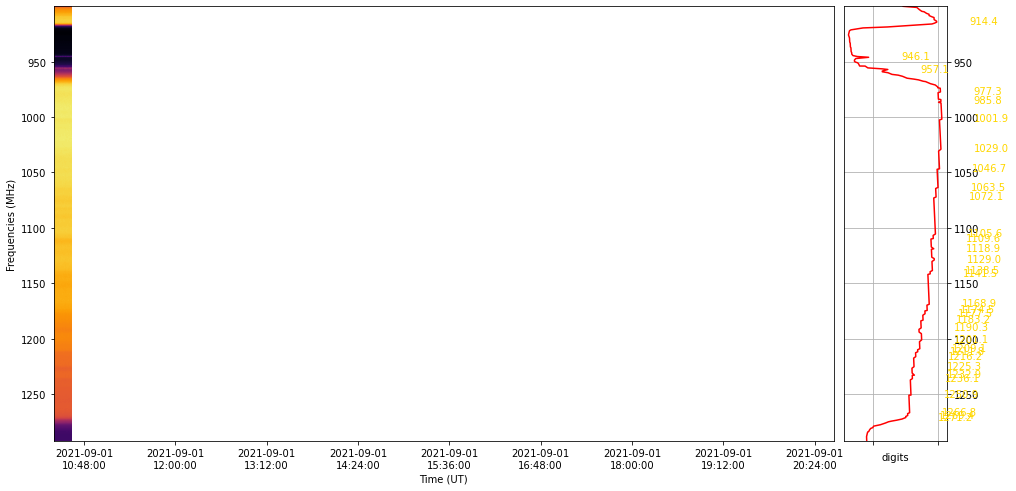

In [17]:
trial_run.instrument.backend.name = "BINGO"
df = trial_run.load_observation()
trial_run.plot_waterfall(df = df);
#df = trial_run.load_observation(calibrate = False)
#trial_run.plot_waterfall(df = df);

### Vendo o céu

A função `plot_pointings` é o principal auxílio visual para o planejamento da observação, com uma visão celeste em coordenadas equatoriais com um grid de coordenadas galacticas opcionais.

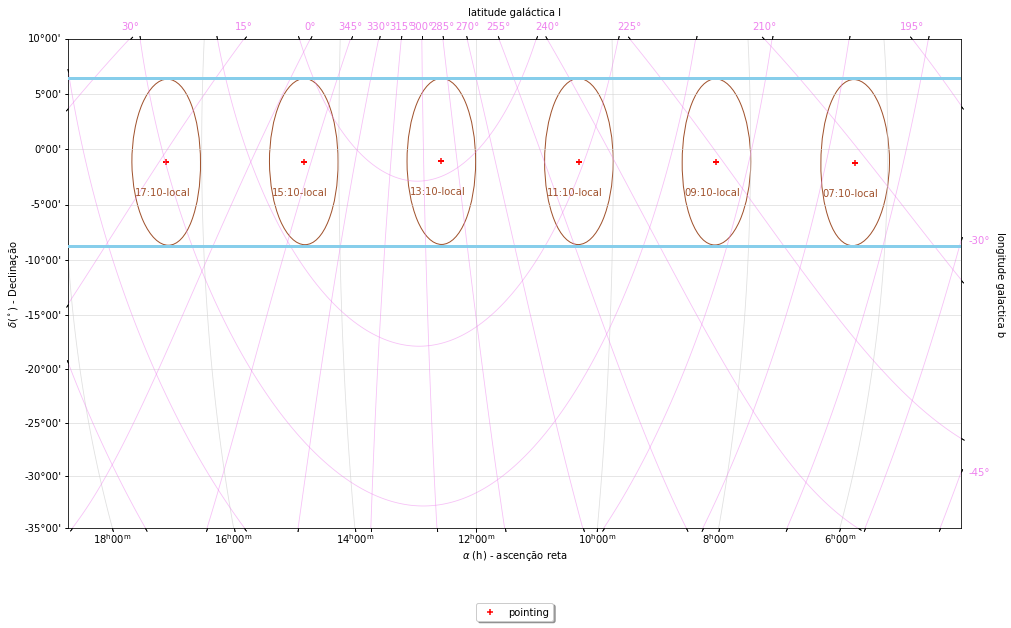

In [18]:
trial_run.plot_pointings(timestamps = True,
                         circles = True,
                         utc = False,
                         interval = "2h",
                         v_offset = -3,
                         ra_lim = [18*u.hourangle, 4*u.hourangle],
                         dec_lim = [-35*u.deg,10*u.deg],
                         galactic = True,
                         wcs = "MOL",
                         legend_offset=-0.2);

Podemos ler dataframes com os dados de coordenadas equatoriais dos objetos celestes de interesse, a partir de dados em arquivos ou em catálogos.

In [19]:
df_local_objects = trial_run.get_local_objects()
df_satellites = trial_run.get_satellites()
df_nvss = obs.load_nvss_catalog().query("S1400>10000")
df_pulsares = obs.load_pulsares()
df_radio = obs.load_radiosources()
df_celestials = pd.concat([df_nvss, df_pulsares])
df_celestial_pointings = trial_run.get_star_cone(df_celestials)
df_radio_pointings = trial_run.get_star_cone(df_radio)

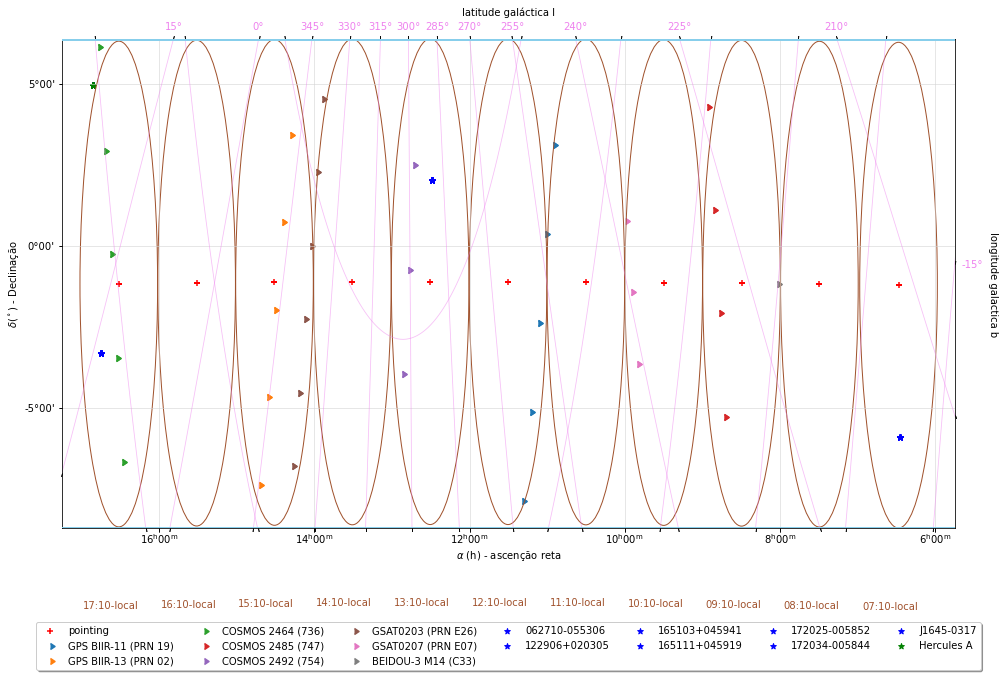

In [20]:
ax = trial_run.plot_pointings();
obs.plot_df(df_satellites, group="NAME", ax = ax, marker = 9);
obs.plot_df(df_local_objects, group="NAME", ax = ax, marker = "o", color = "gold");
obs.plot_df(df_celestial_pointings, group="NAME", ax = ax, marker = "*", color = "blue");
obs.plot_df(df_radio_pointings, group="NAME", ax = ax, marker = "*", color = "green");

Todos os objetos de interesse podem sewr obtidos de uma só vez com a chamada a função `get_all_beam`.

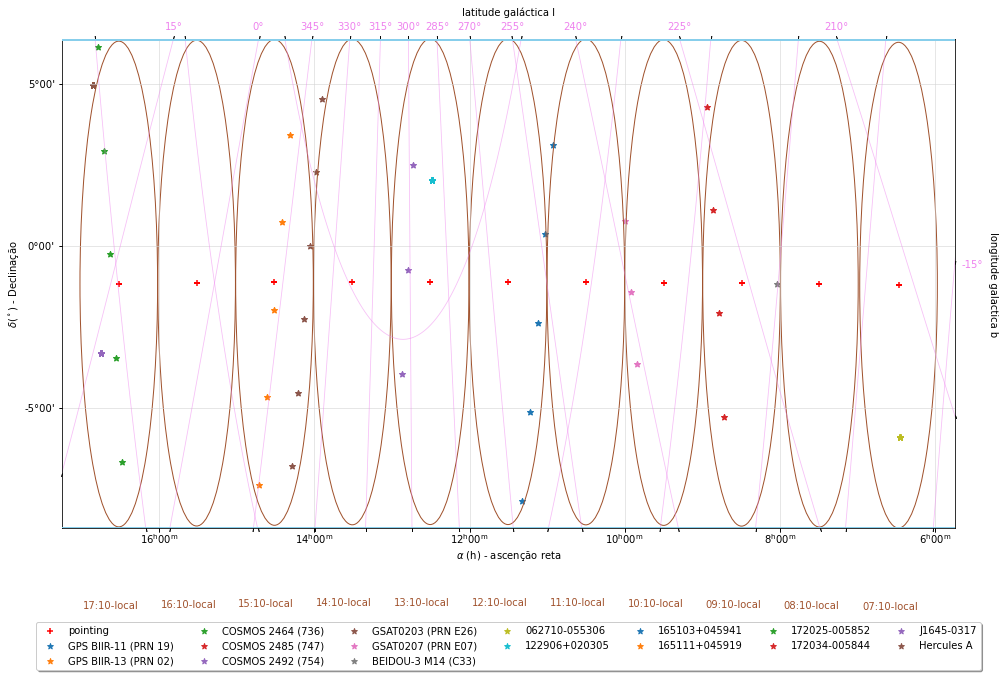

In [21]:
df_all = trial_run.get_all_beam()
ax = trial_run.plot_pointings();
obs.plot_df(df_all, group="NAME", ax = ax, marker = "*");

Para facilidade no planejamento de observações, também é possível acessao uma visão em coordenadas horizontais. Uma função de conveniência para mostrar a posição do equador celeste também está disponível. Observe que os métodos `AltAz` são lentos porque suas operações não são vetorizadas no `skyfield`, mas o desempenho permite a visualização de situações bastante complicadas sem grande demora.

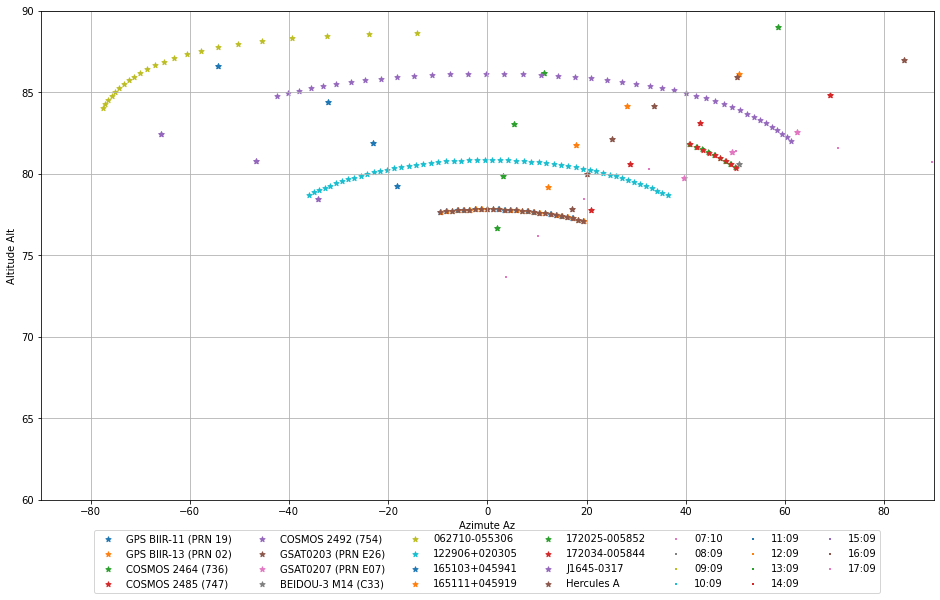

In [22]:
ax = trial_run.plot_sky(markersize = 30)
trial_run.plot_galaxy_altaz(ax = ax, size = 120, utc = False);

## Interessado em um novo objeto

As posições são filtradas com informações dentro do cone do instrumento, considerando o `fwhm` fornecido na classe `Instrument`. Caso não seja desejável fazer a filtragem, é possível utilizar a opção `CONE = FALSE` nas funções `get_local_objects`, `get_star_cone` ou `get_satellites`.

Se o usuário esta interessado na posição de algum objeto não listado que tem uma entrada de identificação no catálogo "SIMBAD", é possível adicionar a função `fetch_radiosources` passando os objetos como argumento:

In [23]:
obs.fetch_radiosources(filename = "../data/auxiliary/new_sources.csv", radiosources = ["3C273"])

arquivo salvo em disco: ../data/auxiliary/new_sources.csv


,MAIN_ID,RA,DEC,NAME
0,3C 273,187.277915,2.052388,3C273


In [24]:
df_newradio = obs.load_radiosources(filename = "../data/auxiliary/new_sources.csv")
df_newradio_pointings = trial_run.get_star_cone(df_newradio)
df_newradio_pointings.head(3)

,TIME,RA,DEC,ANGLE,DISTANCE,NAME
333,2.459459e+06,187.277915,2.052388,7.389336,3.085678e+22,3C273
334,2.459459e+06,187.277915,2.052388,7.163333,3.085678e+22,3C273
335,2.459459e+06,187.277915,2.052388,6.939023,3.085678e+22,3C273


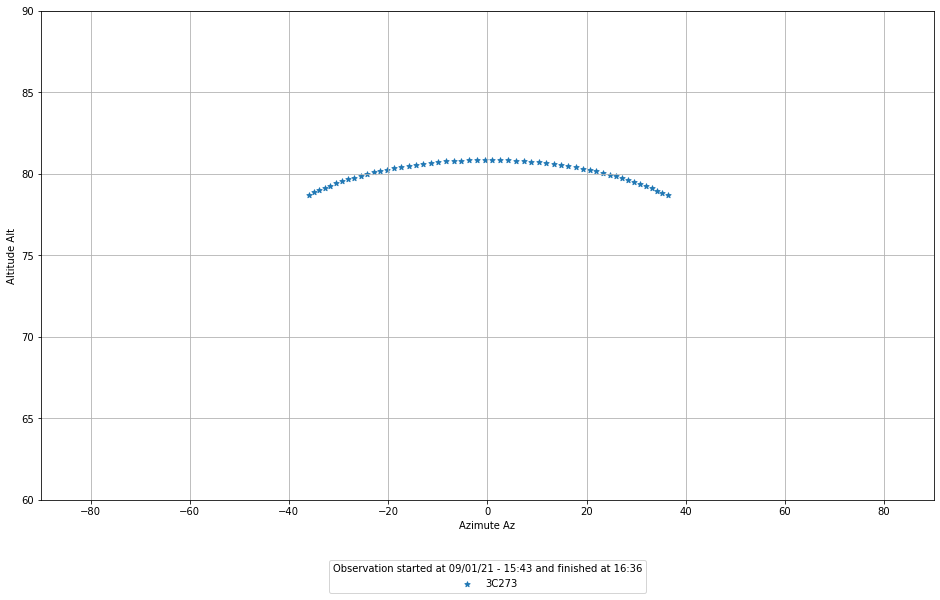

In [25]:
df_AltAz = trial_run.get_altaz_from_radec(objects = df_newradio_pointings)
df_AltAz["TIME"] = pd.to_datetime(df_AltAz.TIME.values, unit = "D", origin = "julian")
trial_run.plot_sky(objects = df_AltAz, markersize = 30);

## Waterfall e Eventos Celestes

In [26]:
begin = Uirapuru.timezone.localize(pd.to_datetime("2021-09-01 1:00:00"))
end = Uirapuru.timezone.localize(pd.to_datetime("2021-09-01 1:25:00"))
duration = (end-begin).total_seconds()
duration_obs = duration*u.s 
trial_run = Observations(t_start = begin, 
                             duration = duration_obs, 
                             instrument = Uirapuru).make_timevector(delta = 1*u.min).make_pointings()

In [27]:
df_data = trial_run.load_observation()
df_sky = trial_run.get_all_beam()
df_sky["TIME"] = pd.to_datetime(df_sky.TIME.values, unit = "D", origin = "julian")

Could not find suitable files to calibrate. Nominal value is set.
Could not find suitable file to calibrate. Using constante background as 170 digits. Provide Dcold dataframe as argument of the function manually instead.


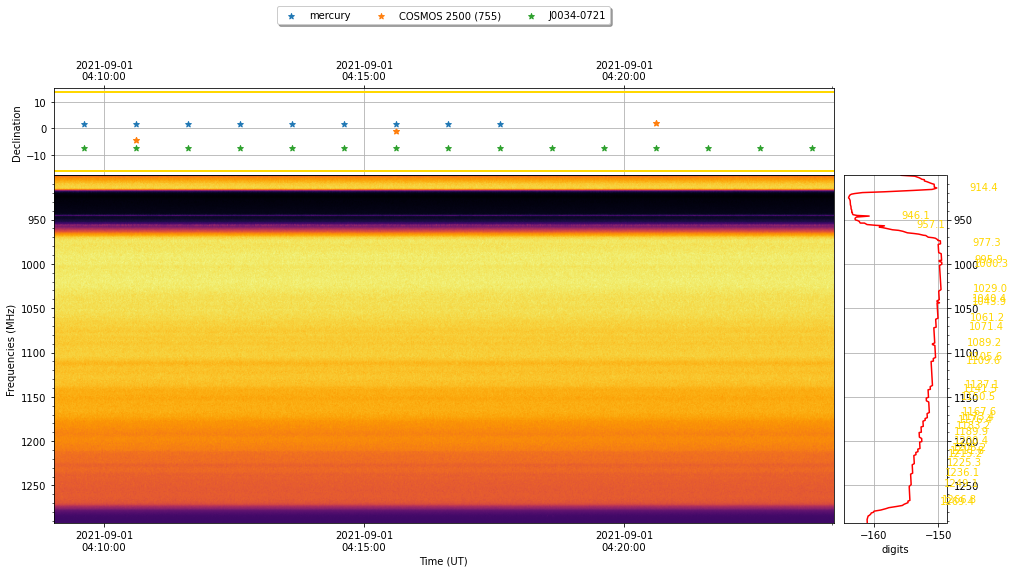

In [28]:
trial_run.plot_timeseries(df_data, df_sky);

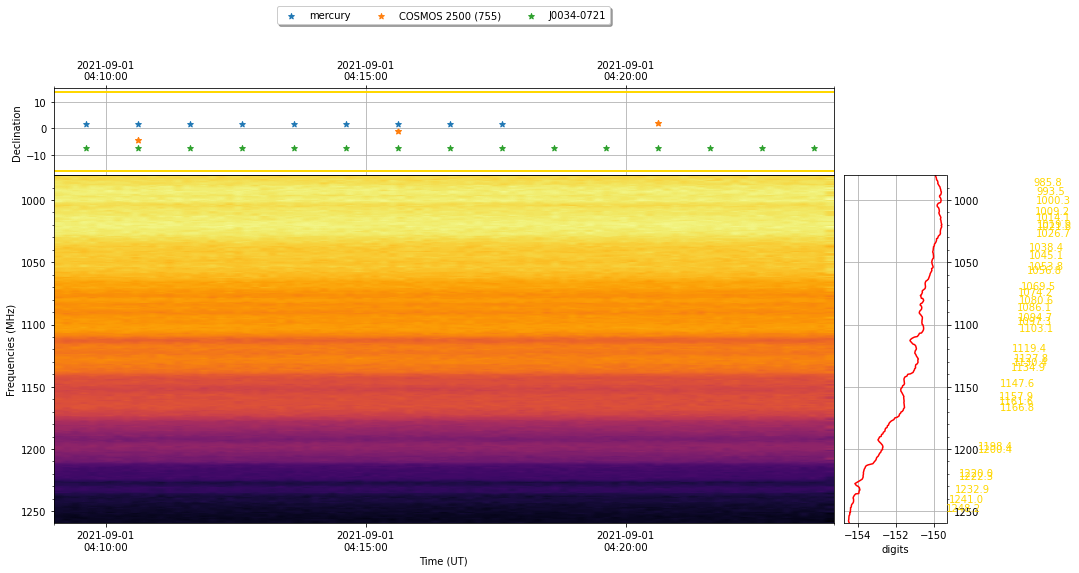

In [29]:
df_data_filt = trial_run.filter_data(df_data, freqs = [980, 1260], duration = 20*u.min, sampling = "10S")
trial_run.plot_timeseries(df_data_filt, df_sky);

# References

<mark> <b>The bib file biblio.bib was not found

</b> </mark>(<a id="cit-numpy2020" href="#call-numpy2020">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-scipy2020" href="#call-scipy2020">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-pandas2020" href="#call-pandas2020">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-astropy2013" href="#call-astropy2013">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-astropy2018" href="#call-astropy2018">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-astroquery2019" href="#call-astroquery2019">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-skyfield2019" href="#call-skyfield2019">?</a>) !! _This reference was not found in biblio.bib _ !!

